<a href="https://colab.research.google.com/github/KatherinneOlaya/Neural-Network-Titanic/blob/main/Redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print("Hola Mundo")

Hola Mundo


# 1. Definir el problema:
| Atributo      | Tipo       | Descripción                                                                    |
| ------------- | ---------- | ------------------------------------------------------------------------------ |
| `survived`    | Binario    | **0 = No sobrevivió**, **1 = Sí sobrevivió** (etiqueta objetivo 🎯)            |
| `pclass`      | Categórico | Clase del boleto: **1 = 1ra clase**, **2 = 2da**, **3 = 3ra**                  |
| `sex`         | Categórico | Sexo biológico: `male` o `female`                                              |
| `age`         | Numérico   | Edad del pasajero (puede tener valores nulos)                                  |
| `sibsp`       | Numérico   | Nº de **hermanos/esposos** a bordo                                             |
| `parch`       | Numérico   | Nº de **padres/hijos** a bordo                                                 |
| `fare`        | Numérico   | Tarifa del pasaje (valor pagado por el boleto)                                 |
| `embarked`    | Categórico | Puerto de embarque: **C** (Cherbourg), **Q** (Queenstown), **S** (Southampton) |
| `class`       | Categórico | Versión textual de `pclass`: 'First', 'Second', 'Third'                        |
| `who`         | Categórico | Clasificación como `man`, `woman`, o `child` según edad y sexo                 |
| `adult_male`  | Booleano   | `True` si el pasajero es un **hombre adulto**, `False` si no                   |
| `deck`        | Categórico | Letra de la **cubierta** donde estaba su cabina (A–G, muchos `NaN`)            |
| `embark_town` | Categórico | Ciudad desde la que embarcó: 'Cherbourg', 'Queenstown' o 'Southampton'         |
| `alive`       | Categórico | Versión textual de `survived`: `'yes'` o `'no'`                                |
| `alone`       | Booleano   | `True` si no tenía familiares a bordo (`sibsp + parch == 0`)                   |



In [180]:
pip install scikeras

In [181]:
import seaborn as sns # Datasets y visualizaciones
import numpy as np # Matematicas
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

from itertools import combinations
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from scikeras.wrappers import KerasClassifier

import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [7]:
dt.shape

(891, 15)

In [4]:
dt = sns.load_dataset('titanic')
dt.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
dt.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


<Axes: >

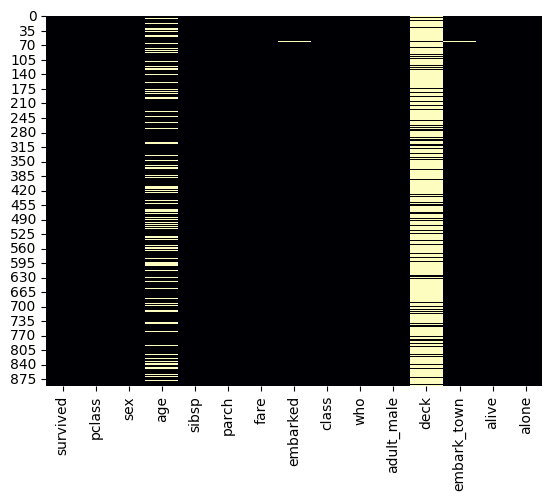

In [9]:
sns.heatmap(dt.isnull(), cmap = 'magma', cbar = False
            )

In [51]:
df = pd.DataFrame(data = dt.dtypes, columns = ['info'])
type_cols = {}

for types in df['info']:
  if types not in type_cols:
    type_cols[types] = 1
  else:
    type_cols[types] += 1



print(type_cols)

{dtype('int64'): 4, dtype('O'): 6, dtype('float64'): 2, CategoricalDtype(categories=['First', 'Second', 'Third'], ordered=False, categories_dtype=object): 1, CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False, categories_dtype=object): 1, dtype('bool'): 1}


In [8]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#  Data Description:

_841_ registers with _15_ attributes in our data
- *6 numerical values and 9 categorical values*
- Our numerical data is with different scales
1. **Age**: Have 177 registers nulls
2. **Embarked**: Have 2 registers nulls
3. **Deck**: Have 688 registers nulls
4. **Embark Town**: Have 2 registers nulls

# EDA: Data Analysis Exploration

In [20]:
dt.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [21]:
# Run just once

new = {'adult_male': 'adult'}
dt.rename(columns = new, inplace = True)

In [33]:
# Run just once
dt['adult'] = dt['adult'].replace({True: 'Male', False: 'Female'})
dt['adult'].value_counts()



,count
adult,
Male,537
Female,354


In [126]:
# Data numerical

numerical_data = dt.select_dtypes(include = np.number)
numerical_data.columns
#print(type(numerical_data))

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [53]:
# Data categorica

categ_data = dt.select_dtypes(exclude = np.number)
categ_data.columns

Index(['sex', 'embarked', 'class', 'who', 'adult', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## Univariate Analysis


 survived 



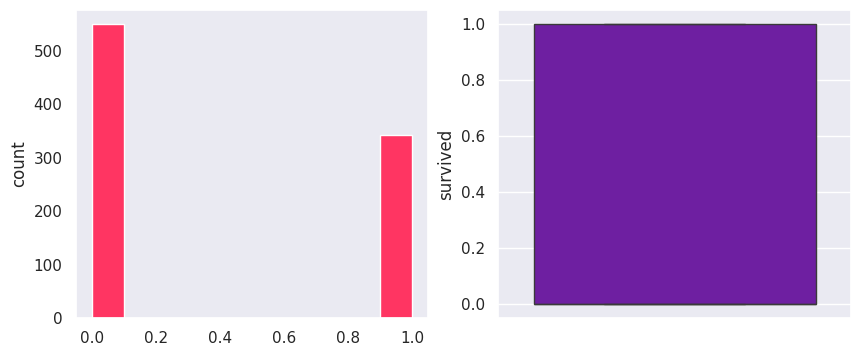


 pclass 



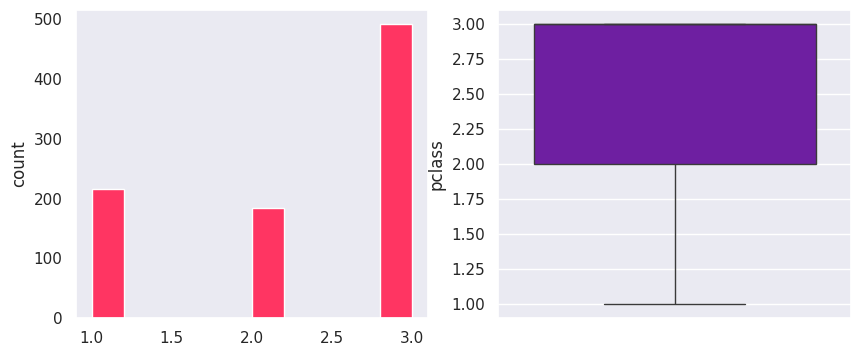


 age 



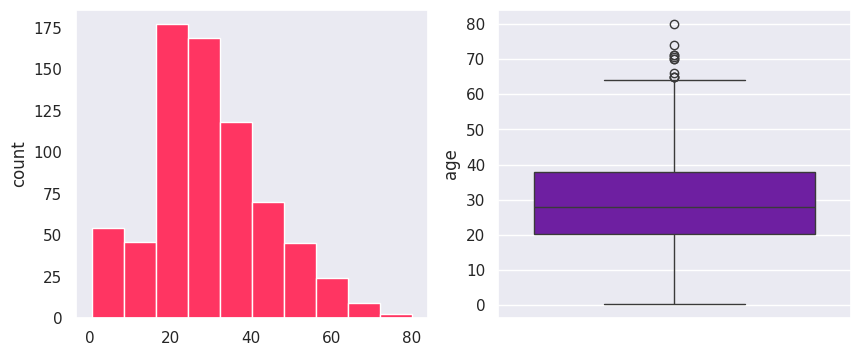


 sibsp 



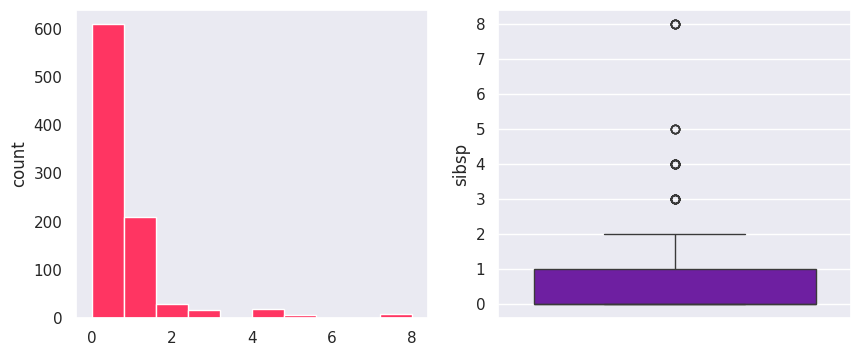


 parch 



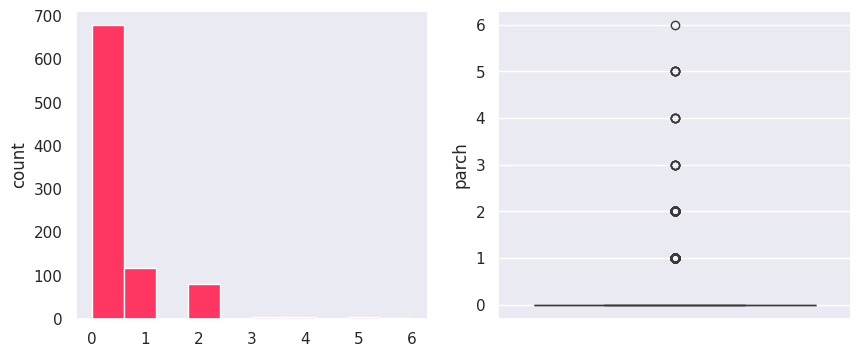


 fare 



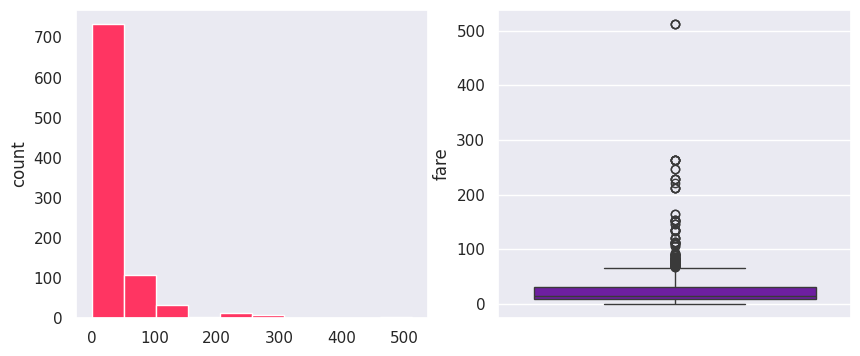

In [14]:
for i in numerical_data:
  sns.set(style = 'darkgrid')
  print('\n', i, '\n')
  plt.figure(figsize = (10,4))
  plt.subplot(1,2,1)
  numerical_data[i].hist(bins = 10, grid = False, color = '#ff3562')
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(numerical_data[i], color = '#7209b7')
  plt.show()


 survived 



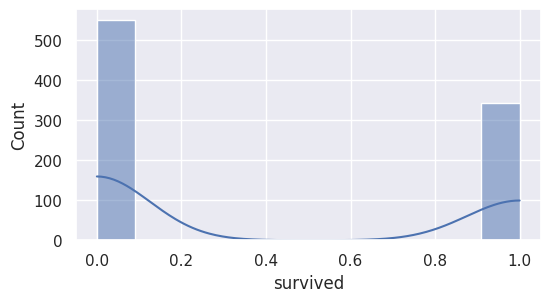


 pclass 



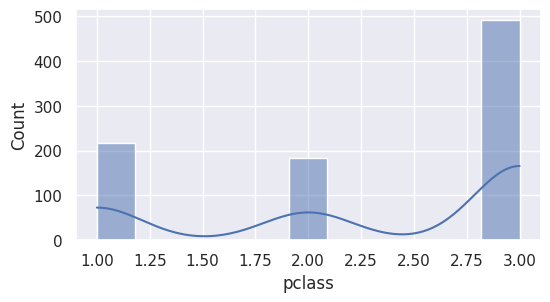


 age 



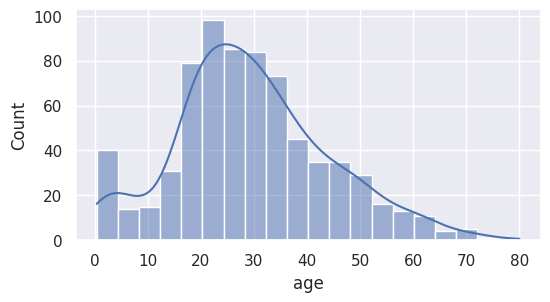


 sibsp 



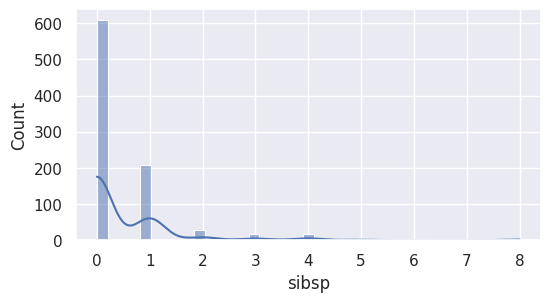


 parch 



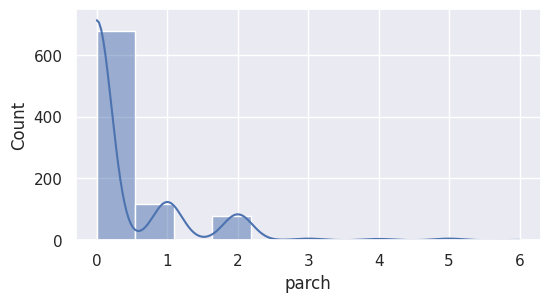


 fare 



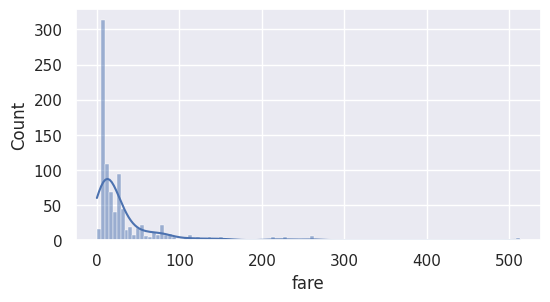

In [15]:
for i in numerical_data.columns:
  sns.set(style = 'darkgrid')
  print('\n', i, '\n')
  plt.figure(figsize = (6,3))
  plt.subplot(1,1,1)
  sns.histplot(data = numerical_data, x = i, kde = True)
  plt.show()

### Categoricas

In [36]:
categ_data.nunique()

,0
sex,2
embarked,3
class,3
who,3
adult,2
deck,7
embark_town,3
alive,2
alone,2


In [37]:
print("Las variables categoricas son :\n")
categ_data.columns.tolist()

Las variables categoricas son :



['sex',
 'embarked',
 'class',
 'who',
 'adult',
 'deck',
 'embark_town',
 'alive',
 'alone']


 sex 



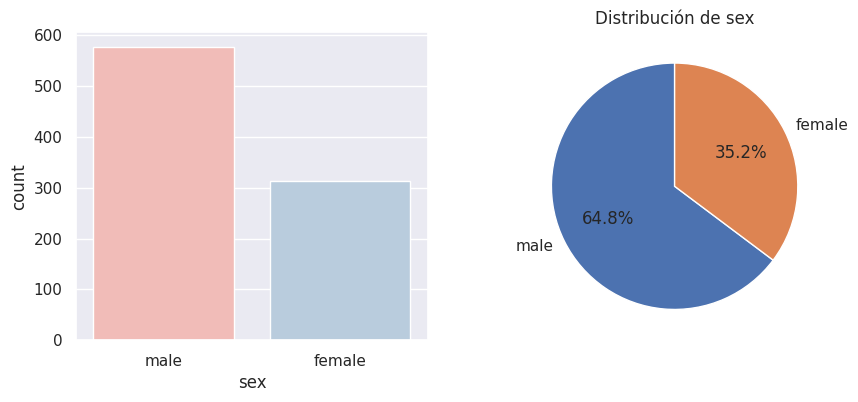


 embarked 



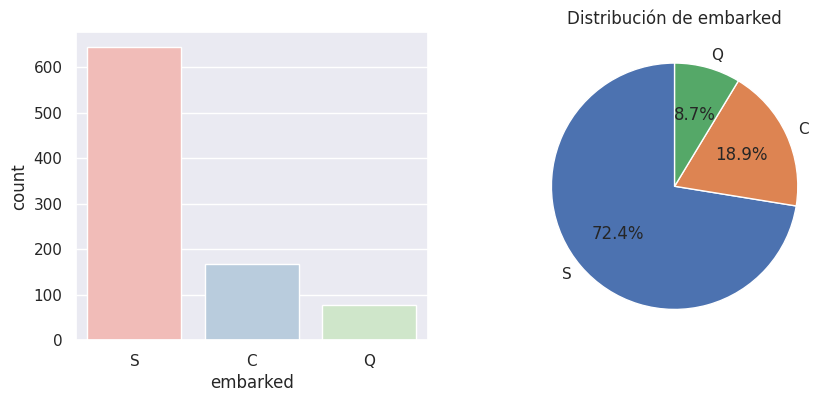


 class 



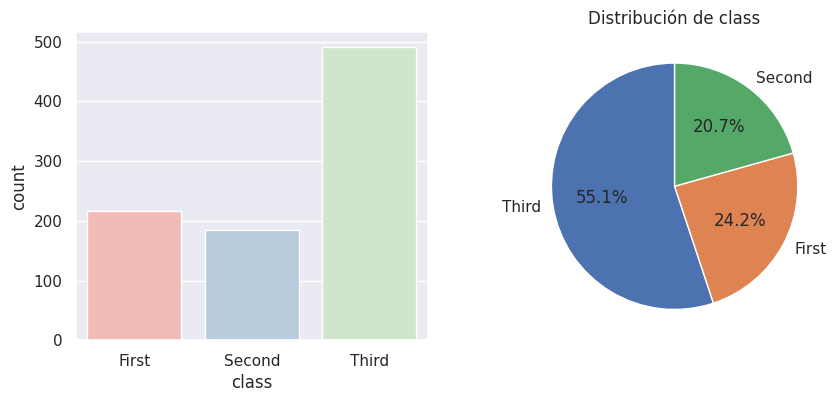


 who 



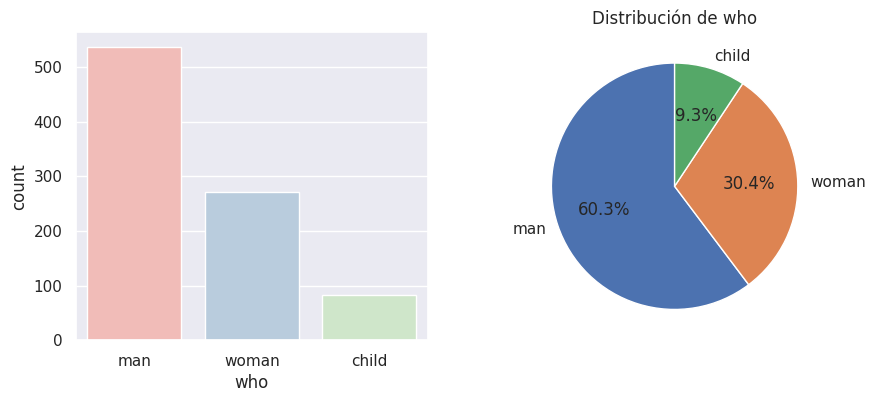


 adult 



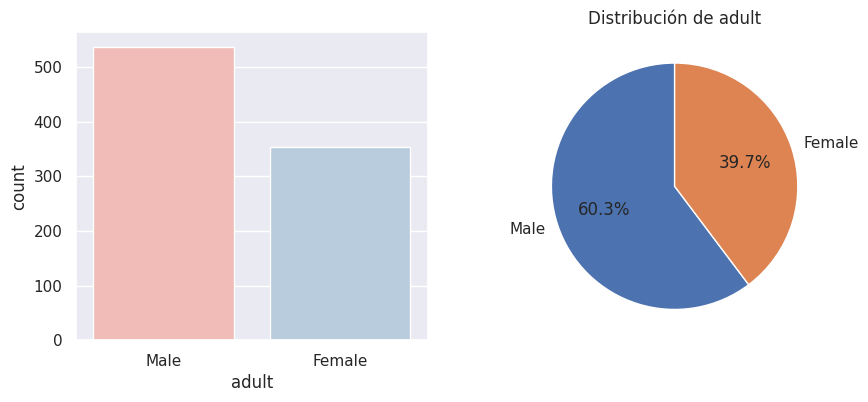


 deck 



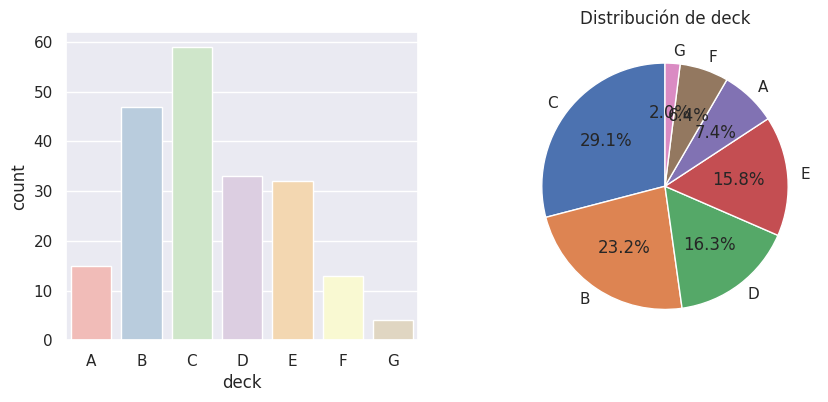


 embark_town 



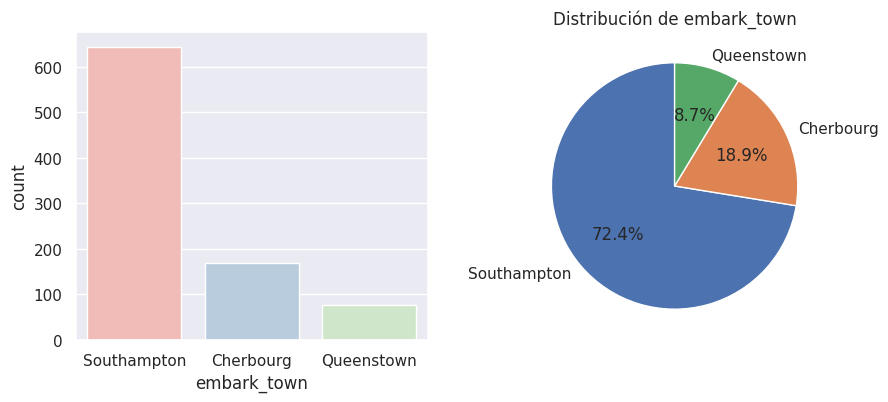


 alive 



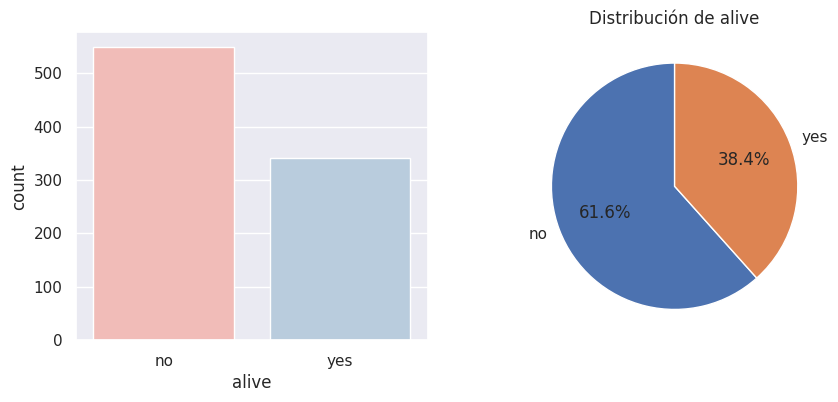


 alone 



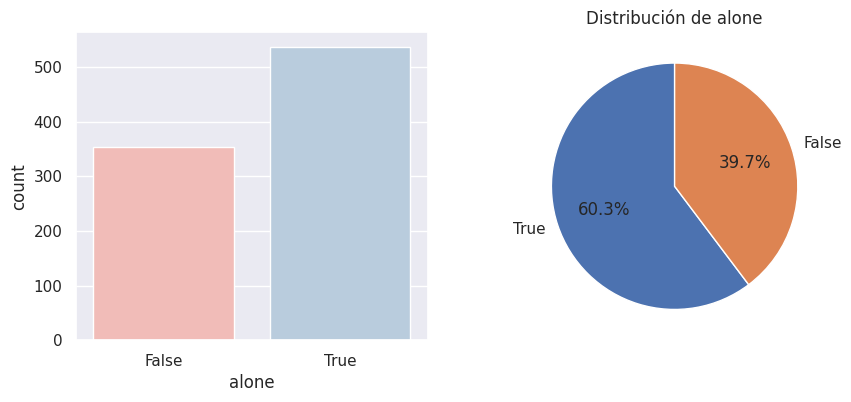

In [38]:
for i in categ_data.columns:
  sns.set(style = 'darkgrid')
  print('\n', i, '\n')
  plt.figure(figsize = (10,4))
  plt.subplot(1,2,1)
  sns.countplot(x = i, data = categ_data, hue=i,  palette = "Pastel1", legend=False ); # <- Modificado
  counts = categ_data[i].value_counts()

  plt.subplot(1,2,2)
  plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Distribución de {i}')


  plt.show()

## Bivariate Analysis

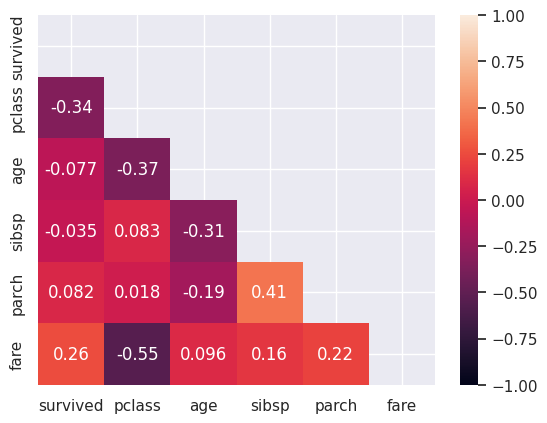

In [58]:
mask  = np.triu(np.ones_like(numerical_data.corr()))
sns.heatmap(numerical_data.corr(), annot = True, mask = mask, vmin =-1, vmax = 1);

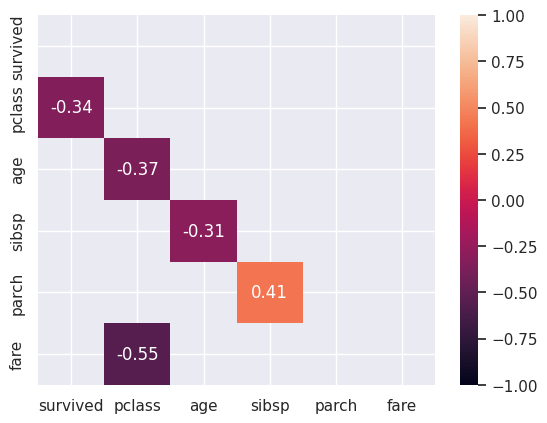

In [72]:
mask_umbra = (numerical_data.corr().abs() <0.3)
mask_f = mask | mask_umbra

sns.heatmap(numerical_data.corr(), annot = True, mask = mask_f, vmin =-1, vmax = 1);

In [70]:
print((numerical_data.corr() > 0.3) | (numerical_data.corr() < -0.3))

          survived  pclass    age  sibsp  parch   fare
survived      True    True  False  False  False  False
pclass        True    True   True  False  False   True
age          False    True   True   True  False  False
sibsp        False   False   True   True   True  False
parch        False   False  False   True   True  False
fare         False    True  False  False  False   True


In [74]:

umbral = 0.3
pares_correlacionados = []


for col1, col2 in combinations(numerical_data.corr().columns, 2):
    corr = numerical_data.corr().loc[col1, col2]
    if abs(corr) > umbral:
        pares_correlacionados.append((col1, col2, round(corr, 2)))


print("Relations:")
for par in pares_correlacionados:
    print(par)

Relations:
('survived', 'pclass', np.float64(-0.34))
('pclass', 'age', np.float64(-0.37))
('pclass', 'fare', np.float64(-0.55))
('age', 'sibsp', np.float64(-0.31))
('sibsp', 'parch', np.float64(0.41))


### Observations📢:
1. Negatives correlations :
  a. _Survived and pclass_. High classes survived more

  b. _Pclass vs fare_: High classes pay more

2. Positive correlation:
  a. _Fare and parch_

  b. _Fare and sibsp_

  c. _Survived and fare_

## Data preprocessing

In [76]:
dt1 = dt.copy()

In [141]:
#dt1.drop(columns = 'class', axis = 1, inplace = True)




In [142]:
dt1.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'adult', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')

In [81]:
dt1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,Male,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,Female,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,Female,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,Female,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,Male,NaN,Southampton,no,True


#### 1. Null values
*Change categorical to object and change null values for median or mode)

In [106]:
categorical_cols_dt1 = dt1.select_dtypes(include=['category']).columns
categorical_cols_dt1

Index(['class', 'deck'], dtype='object')

In [107]:
dt1[categorical_cols_dt1] = dt1[categorical_cols_dt1].astype('object')

In [99]:
nulls = dt1.columns[dt.isnull().any()].tolist()
nulls
# Let's fill nulls. Mode for categorical data and median for numerical data with
#outliers


['age', 'embarked', 'deck', 'embark_town']

In [111]:
for i in nulls:
  if np.issubdtype(dt1[i].dtype, np.number):
    dt1[i].fillna(dt[i].median(), inplace = True)
  else:
    dt1[i].fillna(dt[i].mode()[0], inplace = True)


<ipython-input-111-70e4e7b90c32>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt1[i].fillna(dt[i].median(), inplace = True)
<ipython-input-111-70e4e7b90c32>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [113]:
dt1.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


#### 2. Lable Encode and Onehot

In [123]:
nominal = dt1.select_dtypes(exclude = (np.number)).columns.difference(['class'])
nominal

Index(['adult', 'alive', 'alone', 'deck', 'embark_town', 'embarked', 'sex',
       'who'],
      dtype='object')

##### Observations:
1. Ordinal : Only *Class* for Label Encode, others are nominal
2. Nominal: 'sex', 'embarked', 'who', 'adult', 'deck', 'embark_town','alive', 'alone'

In [128]:
# One hot for nominal:
dt1_oh = pd.get_dummies(dt1, columns = nominal)

dt1_oh.columns.difference(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'])


Index(['adult_Female', 'adult_Male', 'alive_no', 'alive_yes', 'alone_False',
       'alone_True', 'class', 'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E',
       'deck_F', 'deck_G', 'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'who_child', 'who_man', 'who_woman'],
      dtype='object')

In [132]:
dt1_oh = dt1_oh.drop(['adult_Female', 'alive_no', 'alone_False', 'sex_female'], axis=1)
dt1_oh = dt1_oh.rename(columns={
    'adult_Male': 'is_adult',
    'alive_yes': 'is_alive',
    'alone_True': 'is_alone',
    'sex_male': 'is_male'
})

dt1_oh[['is_adult', 'is_alive', 'is_alone', 'is_male']] = dt1_oh[['is_adult', 'is_alive', 'is_alone', 'is_male']].astype(int)

In [135]:
# Change for binary values : 1 True and 0 False
dt1_oh = dt1_oh.astype({col: int for col in dt1_oh.select_dtypes(include='bool').columns})
dt1_oh.head()

,survived,pclass,age,sibsp,parch,fare,class,is_adult,is_alive,is_alone,...,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embarked_C,embarked_Q,embarked_S,is_male,who_child,who_man,who_woman
0,0,3,22.0,1,0,7.2500,Third,1,0,0,...,0,0,1,0,0,1,1,0,1,0
1,1,1,38.0,1,0,71.2833,First,0,1,0,...,1,0,0,1,0,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,Third,0,1,1,...,0,0,1,0,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,First,0,1,0,...,0,0,1,0,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,Third,1,0,1,...,0,0,1,0,0,1,1,0,1,0


In [143]:
# Ordinal values : Class
'''
le = LabelEncoder()
dt1_oh['class'] = le.fit_transform(dt1_oh['class'])
print(dt1_oh['class'].unique())
dt1_oh.head()'''

# Not used, we delete class beacause already exists pclass

"\nle = LabelEncoder()\ndt1_oh['class'] = le.fit_transform(dt1_oh['class'])\nprint(dt1_oh['class'].unique())\ndt1_oh.head()"

#### 3. Remove Outliers

In [149]:
Q1 = dt1_oh[['fare', 'parch', 'sibsp', 'age']].quantile(0.25)
Q3 = dt1_oh[['fare', 'parch', 'sibsp', 'age']].quantile(0.75)
IQR = Q3 - Q1

dt1_encoded_filtered = dt1_oh[
    ~((dt1_oh[['fare', 'parch', 'sibsp', 'age']] < (Q1 - 1.5 * IQR)) | (
           dt1_oh[['fare', 'parch', 'sibsp', 'age']] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dt1_oh.shape, dt1_encoded_filtered.shape, '\nDeleted ', (round((dt1_oh.shape[0] - dt1_encoded_filtered.shape[0])/dt1_oh.shape[0]*100,2)))

(891, 27) (577, 27) 
Deleted  35.24


#### Observations:
35% of our data was eliminated, so we don't use this method

In [150]:
# Capping:
capp_col = ['fare', 'parch', 'sibsp', 'age']

for col in capp_col:
  lower = dt1_oh[col].quantile(0.05)
  upper = dt1_oh[col].quantile(0.95)
  dt1_oh[col] = dt1_oh[col].clip(lower=lower, upper=upper)

dt1_oh.shape


(891, 27)

#### 4. SMOTE TECHNIQUE

In [168]:
#dt1_oh.drop(columns = ['is_alive'], axis = 1, inplace = True)
#dt1_oh.drop(columns = ['class'], axis = 1, inplace = True)
dt1_oh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      891 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   is_adult                 891 non-null    int64  
 7   is_alone                 891 non-null    int64  
 8   deck_A                   891 non-null    int64  
 9   deck_B                   891 non-null    int64  
 10  deck_C                   891 non-null    int64  
 11  deck_D                   891 non-null    int64  
 12  deck_E                   891 non-null    int64  
 13  deck_F                   891 non-null    int64  
 14  deck_G                   8

In [169]:
dt1_oh['survived'].value_counts()

,count
survived,
0,549
1,342


In [170]:
X = dt1_oh.drop('survived', axis = 1)
y = dt1_oh['survived']

In [171]:
X, y = SMOTE().fit_resample(X, y)
np.unique(y, return_counts=True)


(array([0, 1]), array([549, 549]))

#### 5. Normalization


 survived 



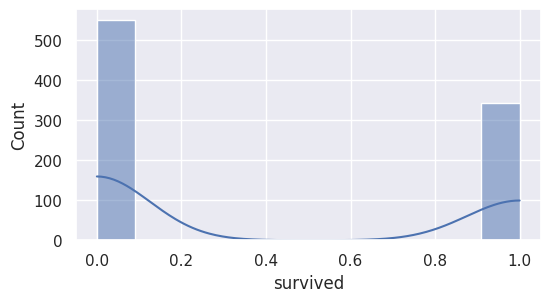


 pclass 



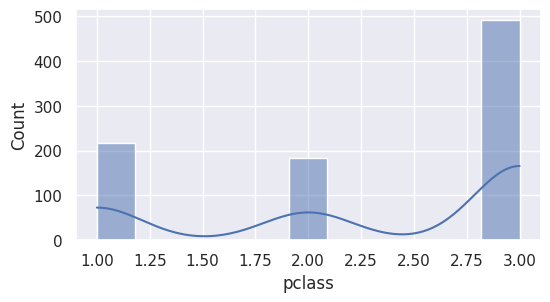


 age 



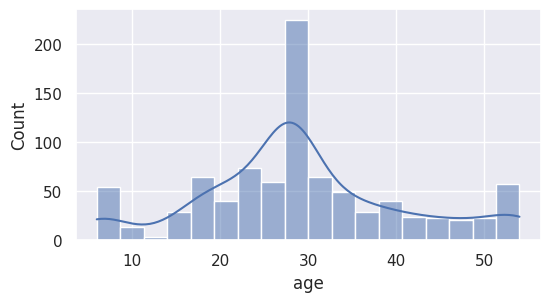


 sibsp 



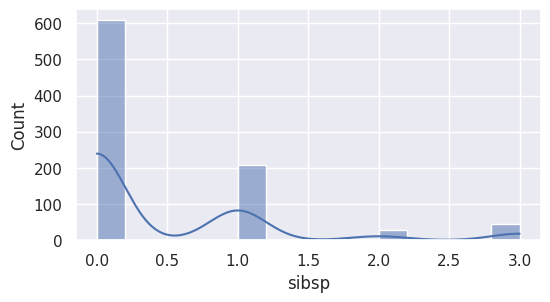


 parch 



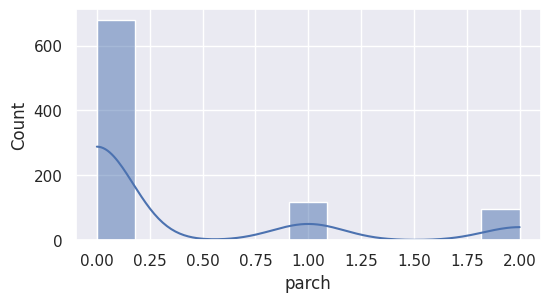


 fare 



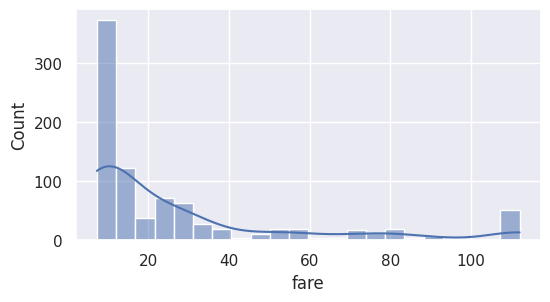


 is_adult 



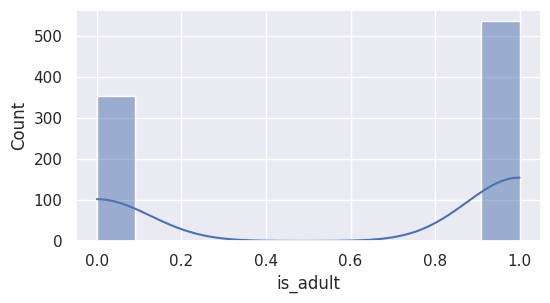


 is_alone 



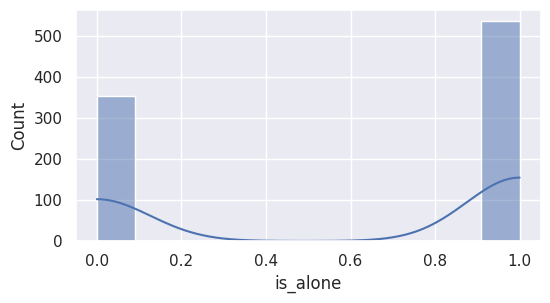


 deck_A 



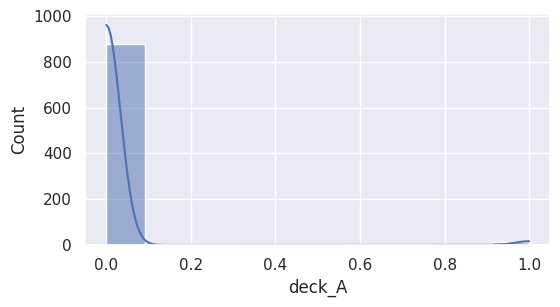


 deck_B 



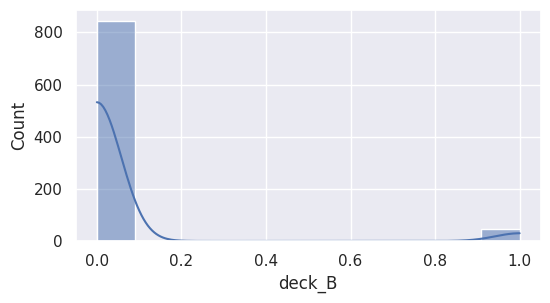


 deck_C 



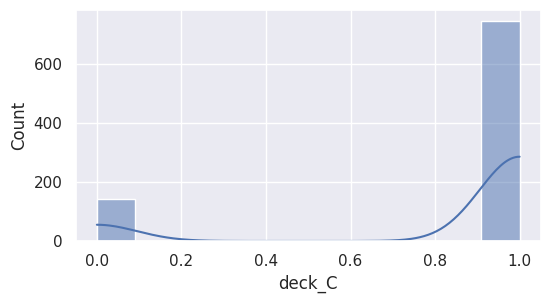


 deck_D 



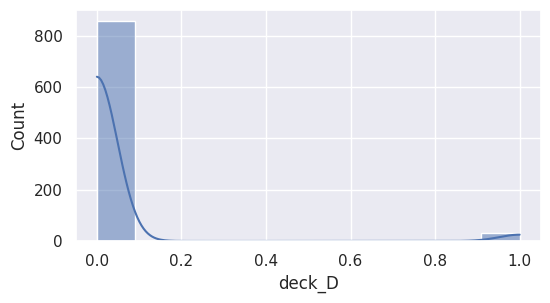


 deck_E 



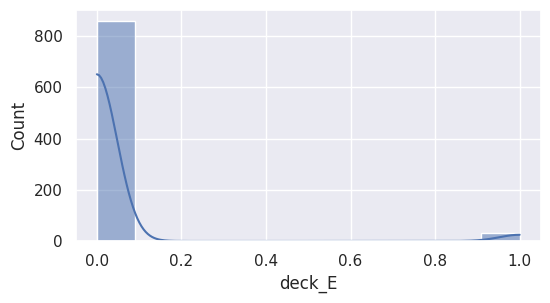


 deck_F 



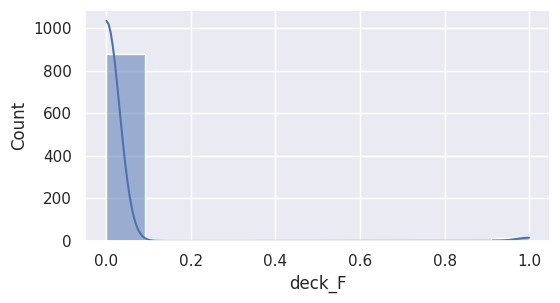


 deck_G 



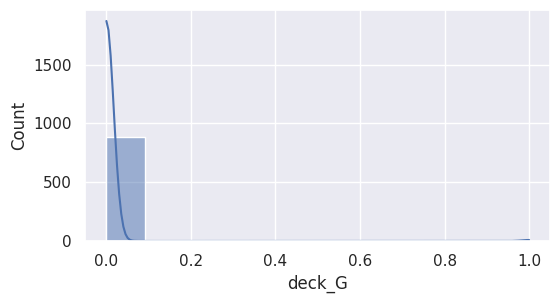


 embark_town_Cherbourg 



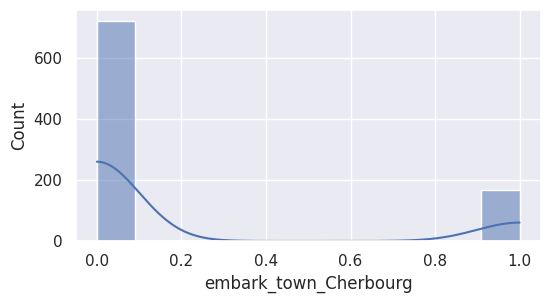


 embark_town_Queenstown 



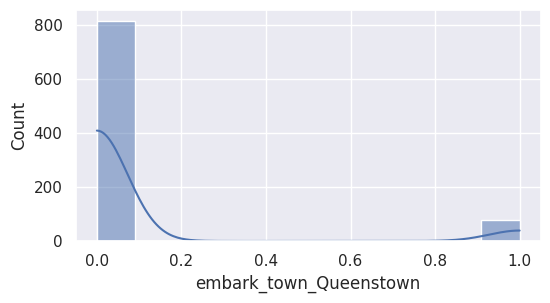


 embark_town_Southampton 



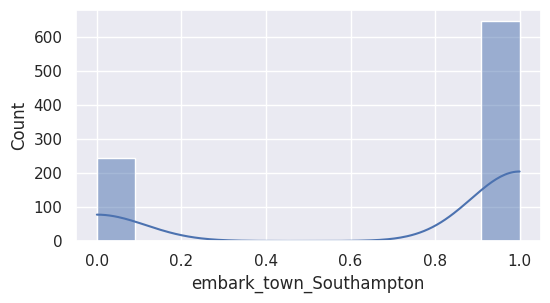


 embarked_C 



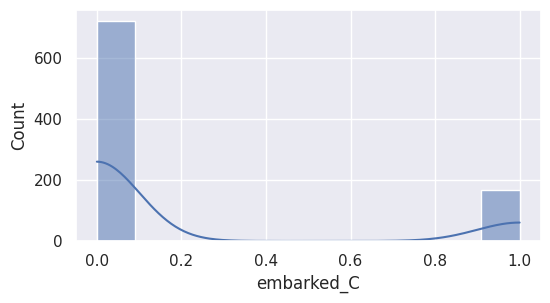


 embarked_Q 



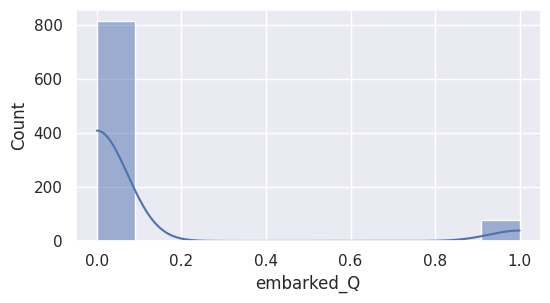


 embarked_S 



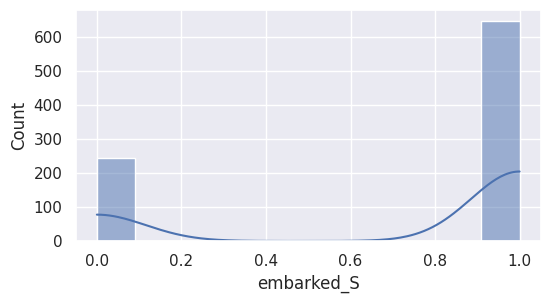


 is_male 



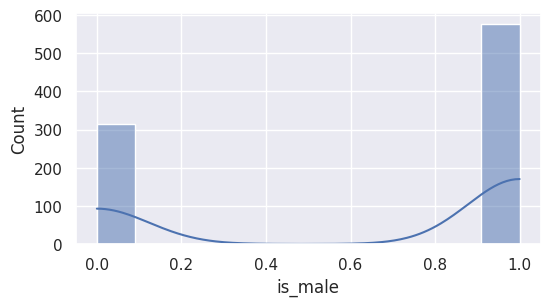


 who_child 



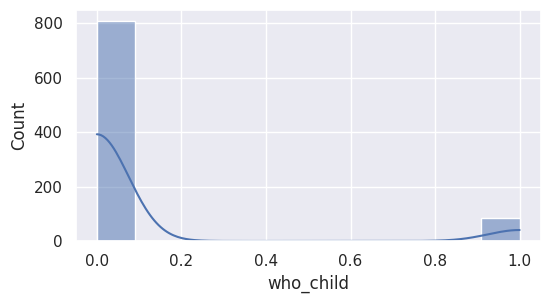


 who_man 



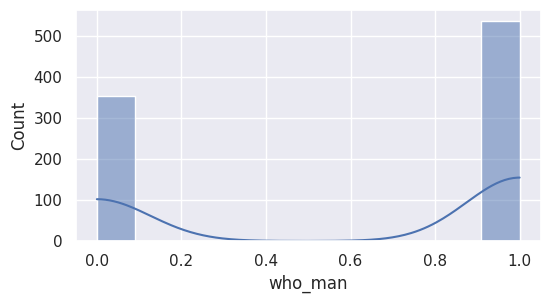


 who_woman 



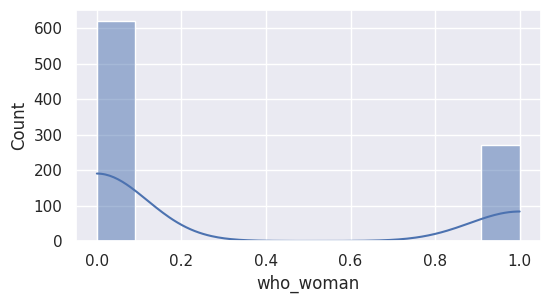

In [172]:
for i in dt1_oh.columns:
  sns.set(style = 'darkgrid')
  print('\n', i, '\n')
  plt.figure(figsize = (6,3))
  plt.subplot(1,1,1)
  sns.histplot(data = dt1_oh, x = i, kde = True)
  plt.show()

In [173]:
dt1_oh.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.000,0.0000,0.0000,1.0,1.00000
pclass,891.0,2.308642,0.836071,1.000,2.0000,3.0000,3.0,3.00000
age,891.0,29.157127,11.728914,6.000,22.0000,28.0000,35.0,54.00000
sibsp,891.0,0.452301,0.788059,0.000,0.0000,0.0000,1.0,3.00000
parch,891.0,0.345679,0.663266,0.000,0.0000,0.0000,0.0,2.00000
fare,891.0,27.857570,29.112872,7.225,7.9104,14.4542,31.0,112.07915
is_adult,891.0,0.602694,0.489615,0.000,0.0000,1.0000,1.0,1.00000
is_alone,891.0,0.602694,0.489615,0.000,0.0000,1.0000,1.0,1.00000
deck_A,891.0,0.016835,0.128725,0.000,0.0000,0.0000,0.0,1.00000
deck_B,891.0,0.052750,0.223659,0.000,0.0000,0.0000,0.0,1.00000


In [175]:

# para redes neuronales
numerical_cols_to_scale = ['fare', 'parch', 'sibsp', 'age', 'pclass']
scaler = StandardScaler()
dt1_oh[numerical_cols_to_scale] = scaler.fit_transform(dt1_oh[numerical_cols_to_scale])

# MODEL

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)

In [187]:
dt1_oh.shape

(891, 25)

In [185]:
backend.clear_session()
np.random.seed(42)

import random
random.seed(42)
tf.random.set_seed(42)

In [192]:
def build_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=24, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [194]:
keras_estimator = KerasClassifier(build_fn=build_model, verbose=1)

optimizer = ['adam', 'sgd']
batch_size = [32, 64, 128]
param_grid = dict(optimizer=optimizer, batch_size=batch_size)

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid, n_jobs=-1)

In [196]:
!pip install --upgrade scikit-learn scikeras

In [198]:
import time

begin = time.time()

grid_result = grid.fit(X_train, y_train, validation_split=0.2, verbose=1)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Promedio: %f (Std: %f) con: %r" % (mean, stdev, param))

end = time.time()

print(f"Total runtime of the program is {end - begin}")

AttributeError: 'super' object has no attribute '__sklearn_tags__'

#### Observation:
##### Optimizer:
1. *Adam*: Used for binary or multiclass
2. *SGD* : Used for preccision and tf.control_dependencies

#### Metrics:
1. *Accuracy*: Correct predictions
2. *Precision*:
3. *Recall*
4. *AUC* : Area under curve

In [193]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,777 (14.75 KB)

 Trainable params: 3,777 (14.75 KB)

 Non-trainable params: 0 (0.00 B)